In [90]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Prosper Loan Data Findings
##### (Communicate Data Findings)
#### 2010 ~ 2013

### Intodaction

#### Borrowing rates are of high importance, so we will examine the factors affecting the rate during the period from 2010 to 2013
#### This project is divided into two major parts :

#### 1- In the first part, we will conduct an exploratory data analysis on a dataset of prosperLoanData. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

#### 2- In the second part, We will take our main findings from our exploration and convey them to others through an explanatory analysis. To this end, We will create a slide deck that leverages polished, explanatory visualizations to communicate your results.



In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import matplotlib.ticker as ticker
%matplotlib inline
warnings.filterwarnings('ignore')
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

In [92]:
#load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [93]:
print(loan.shape)

(113937, 81)


In [94]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [96]:
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [97]:
loan.duplicated().sum()

0

In [98]:
loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [99]:
missing_values= loan.isnull()
#missing_values.head()
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print(" ")

ListingKey
False    113937
Name: ListingKey, dtype: int64
 
ListingNumber
False    113937
Name: ListingNumber, dtype: int64
 
ListingCreationDate
False    113937
Name: ListingCreationDate, dtype: int64
 
CreditGrade
True     84984
False    28953
Name: CreditGrade, dtype: int64
 
Term
False    113937
Name: Term, dtype: int64
 
LoanStatus
False    113937
Name: LoanStatus, dtype: int64
 
ClosedDate
True     58848
False    55089
Name: ClosedDate, dtype: int64
 
BorrowerAPR
False    113912
True         25
Name: BorrowerAPR, dtype: int64
 
BorrowerRate
False    113937
Name: BorrowerRate, dtype: int64
 
LenderYield
False    113937
Name: LenderYield, dtype: int64
 
EstimatedEffectiveYield
False    84853
True     29084
Name: EstimatedEffectiveYield, dtype: int64
 
EstimatedLoss
False    84853
True     29084
Name: EstimatedLoss, dtype: int64
 
EstimatedReturn
False    84853
True     29084
Name: EstimatedReturn, dtype: int64
 
ProsperRating (numeric)
False    84853
True     29084
Name: ProsperRat

In [100]:
# Getting the number of missing values in each column
missing_values = loan.isna().sum()

# Excluding columns that contains 0 missing values
missing_values = missing_values[missing_values >= 1]

# Getting the percentages of missing values and round down the result 
percent_missing = missing_values * 100 / loan.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([missing_values, percent_missing], axis=1, 
          keys=['missing_values', 'Percentage']).\
          sort_values(by="missing_values", ascending=False)

,missing_values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


#### It seems that there are a lot of nulls for most of the variables in the dataset since I'm only interested to investigate some of the features from this dataset, I will subset the dataframe to extract the features of interest for my analysis and remove the nulls for this subset dataframe only but first we will extract dataset from 2010 until 2013

In [101]:
# to extract year (2013) from loan data set must be first
#define year,quarter column as int
sr =pd.to_datetime(loan['LoanOriginationDate'])
loan['year'] = pd.PeriodIndex(sr, freq='Y').sort_values()
loan['quarter'] = pd.PeriodIndex(sr, freq='Q').sort_values()

In [102]:
#cast year from objec to int
loan['year']= loan['year'].astype(str).astype(int)

In [103]:
loan.groupby('year').count()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,quarter
year,,,,,,,,,,,,,,,,,,,,,
2005,22,22,22,5,22,22,6,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2006,5906,5906,5906,1479,5906,5906,2835,5905,5906,5906,...,5906,5906,5906,5906,5906,5906,5906,5906,5906,5906
2007,11460,11460,11460,2938,11460,11460,5553,11459,11460,11460,...,11460,11460,11460,11460,11460,11460,11460,11460,11460,11460
2008,11552,11552,11552,2967,11552,11552,5596,11550,11552,11552,...,11552,11552,11552,11552,11552,11552,11552,11552,11552,11552
2009,2047,2047,2047,507,2047,2047,984,2046,2047,2047,...,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047
2010,5652,5652,5652,1411,5652,5652,2745,5652,5652,5652,...,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652
2011,11228,11228,11228,2864,11228,11228,5464,11226,11228,11228,...,11228,11228,11228,11228,11228,11228,11228,11228,11228,11228
2012,19553,19553,19553,4998,19553,19553,9547,19552,19553,19553,...,19553,19553,19553,19553,19553,19553,19553,19553,19553,19553
2013,34345,34345,34345,8652,34345,34345,16405,34335,34345,34345,...,34345,34345,34345,34345,34345,34345,34345,34345,34345,34345


In [104]:
#extract Prosper loan from 2010 to 2013
loans=loan.loc[(loan['year'] >=2010) & (loan['year'] <= 2013)]
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70778 entries, 30987 to 101764
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype        
---  ------                               --------------  -----        
 0   ListingKey                           70778 non-null  object       
 1   ListingNumber                        70778 non-null  int64        
 2   ListingCreationDate                  70778 non-null  object       
 3   CreditGrade                          17925 non-null  object       
 4   Term                                 70778 non-null  int64        
 5   LoanStatus                           70778 non-null  object       
 6   ClosedDate                           34161 non-null  object       
 7   BorrowerAPR                          70765 non-null  float64      
 8   BorrowerRate                         70778 non-null  float64      
 9   LenderYield                          70778 non-null  float64      
 10  EstimatedEffectiv

In [105]:
#Define features of interest for this analysis
features =   ['Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)',
              'EmploymentStatus', 'StatedMonthlyIncome', 'TotalProsperLoans','LoanOriginalAmount','ProsperScore','IncomeRange',
              'LoanOriginationDate','quarter','year' ]

In [106]:
#Look at the dataset
loans[features].sample(6)

,Term,LoanStatus,BorrowerRate,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,ProsperScore,IncomeRange,LoanOriginationDate,quarter,year
58302,36,Completed,0.2399,0.27467,D,2,Employed,2500.000000,1.0,6000,4.0,"$25,000-49,999",2011-06-30 00:00:00,2012Q3,2012
48030,60,Current,0.2304,0.25564,D,1,Employed,4432.500000,NaN,12000,5.0,"$50,000-74,999",2013-12-30 00:00:00,2012Q1,2012
49991,36,Completed,0.0835,0.10436,A,7,Full-time,5958.333333,1.0,7200,9.0,"$50,000-74,999",2010-01-28 00:00:00,2012Q1,2012
42960,36,Current,0.1154,0.14358,A,1,Employed,6666.666667,NaN,12500,9.0,"$75,000-99,999",2012-01-19 00:00:00,2011Q3,2011
77036,36,Current,0.2045,0.24205,C,1,Employed,5833.333333,NaN,20000,5.0,"$50,000-74,999",2013-10-21 00:00:00,2013Q2,2013
59976,36,Chargedoff,0.1820,0.18927,NaN,0,Full-time,8000.000000,NaN,8500,NaN,"$75,000-99,999",2007-06-12 00:00:00,2012Q3,2012


In [107]:
loans[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70778 entries, 30987 to 101764
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype        
---  ------                     --------------  -----        
 0   Term                       70778 non-null  int64        
 1   LoanStatus                 70778 non-null  object       
 2   BorrowerRate               70778 non-null  float64      
 3   BorrowerAPR                70765 non-null  float64      
 4   ProsperRating (Alpha)      52764 non-null  object       
 5   ListingCategory (numeric)  70778 non-null  int64        
 6   EmploymentStatus           69374 non-null  object       
 7   StatedMonthlyIncome        70778 non-null  float64      
 8   TotalProsperLoans          13750 non-null  float64      
 9   LoanOriginalAmount         70778 non-null  int64        
 10  ProsperScore               52764 non-null  float64      
 11  IncomeRange                70778 non-null  object       
 12  LoanOriginati

In [108]:
# Check unique LoanStatus
loans['LoanStatus'].unique()

array(['Completed', 'Current', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'FinalPaymentInProgress', 'Past Due (61-90 days)',
       'Past Due (16-30 days)', 'Past Due (91-120 days)',
       'Past Due (>120 days)', 'Cancelled'], dtype=object)

In [109]:
# Check unique Employment Status
loans['EmploymentStatus'].unique()

array(['Employed', 'Self-employed', 'Not available', 'Full-time', 'Other',
       'Part-time', nan, 'Retired', 'Not employed'], dtype=object)

In [110]:
# Check unique Employment Status
loans['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed',
       '$75,000-99,999', '$100,000+', '$1-24,999', '$0', 'Not employed'],
      dtype=object)

In [111]:
# Check unique ProsperRating (Alpha) Status
loans['ProsperRating (Alpha)'].unique()

array(['HR', 'C', nan, 'A', 'B', 'D', 'E', 'AA'], dtype=object)

##### Since the variables EmploymentStatus, ProsperScore, Term ,LoanStatus are basically categorical variabels, I will change their datatype till categorical


In [112]:
loans['ProsperScore'] = loans['ProsperScore'].astype('category')
loans['Term'] = loans['Term'].astype('category')
loans['IncomeRange'] = loans['IncomeRange'].astype('category')
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
print(loans[features].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70778 entries, 30987 to 101764
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype        
---  ------                     --------------  -----        
 0   Term                       70778 non-null  category     
 1   LoanStatus                 70778 non-null  category     
 2   BorrowerRate               70778 non-null  float64      
 3   BorrowerAPR                70765 non-null  float64      
 4   ProsperRating (Alpha)      52764 non-null  object       
 5   ListingCategory (numeric)  70778 non-null  int64        
 6   EmploymentStatus           69374 non-null  category     
 7   StatedMonthlyIncome        70778 non-null  float64      
 8   TotalProsperLoans          13750 non-null  float64      
 9   LoanOriginalAmount         70778 non-null  int64        
 10  ProsperScore               52764 non-null  category     
 11  IncomeRange                70778 non-null  category     
 12  LoanOriginati

## What is the structure of your dataset?
#### There are total of 70778  loans entries saved in the dataset and 18 attributes. 
#### Each loan contain information on the borrowered's background information and details regarding the loans.
#### This analysis will focus on years between (2010 and 2013) and factors that are related to Prosper loans status (LoanStatus).

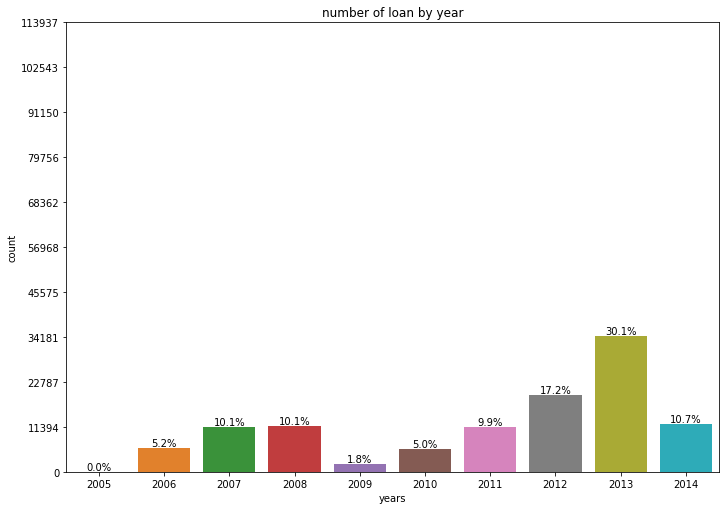

In [113]:
#First let's take a look at number of loans variable by years using a Count Plot:
plt.figure(figsize=[ 11.69, 8.27])
ncount = len(loan)
ax=sb.countplot(data=loan, x='year')
plt.title('number of loan by year')
plt.xlabel('years')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)
plt.show()

## What is/are the main feature(s) of interest in your dataset?
#### This analysis will focus on figuring out what features are best for predicting Prosper's loan statuses.
#### The independent variables of interest are:
1-  Term                       
2-  LoanStatus                 
3-  BorrowerRate               
4-  ProsperRating (Alpha)      
5-  ListingCategory (numeric)    
6-  EmploymentStatus            
7-  StatedMonthlyIncome        
8-  TotalProsperLoans          
9-  LoanOriginalAmount           
10- LoanOriginationDate         
11- Recommendations              
12- Investors                   
13- BorrowerAPR                
14- ProsperScore              
15- Occupation                  
16- IncomeRange
17- year
18- quarter

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
#### The present analysis will investigate a group of borrowers features along with the type of the listing/loan will be analyzed to correctly understand which factors likely impact Prosper's final loan status.

#### The features listed in the previous section will be subject of this analysis. However, we do understand that it isn't exhaustive and additional features may be required, as well as a deeper business understanding and history of decisions made by Prosper top management.

## Univariate Exploration

#### In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.



In [114]:
# setting plt size and color
plt.figure(figsize=[ 11.69, 8.27])
default_color = sb.color_palette()[9]
ncount = len(loans)

<Figure size 841.68x595.44 with 0 Axes>

(0.0, 70778.0)

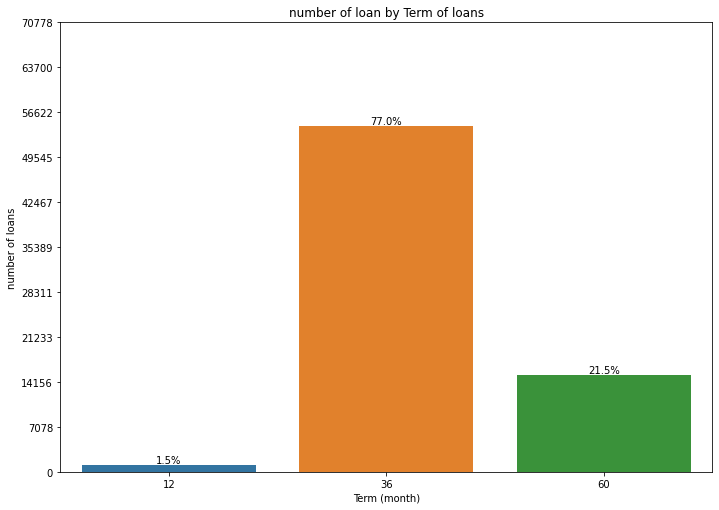

In [115]:
#First let's take a look at Term variable using a Count Plot:
#Visulizing the time period '2013' for loan
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans[features], x='Term')
plt.title('number of loan by Term of loans')
plt.xlabel('Term (month)')
plt.ylabel('number of loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### For Term: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check LoanStatus:

(0.0, 70778.0)

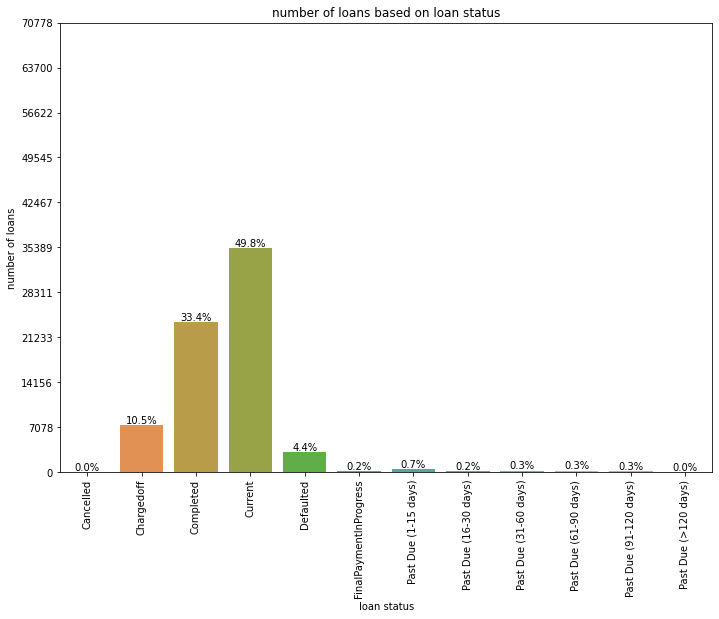

In [116]:
plt.figure(figsize=[ 11.69, 8.27])
plt.xticks(rotation=90)
ax=sb.countplot(data=loans[features], x='LoanStatus')
plt.title('number of loans based on loan status')
plt.xlabel('loan status')
plt.ylabel('number of loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### Most of the loans in the dataset are actually Current loans. Following it with a big frequency the Completed loans, followed by Chargedoff, while Defaulted and Past due categories loans represent a minority. Up next - BorrowerRate:

Text(0, 0.5, 'number of loans')

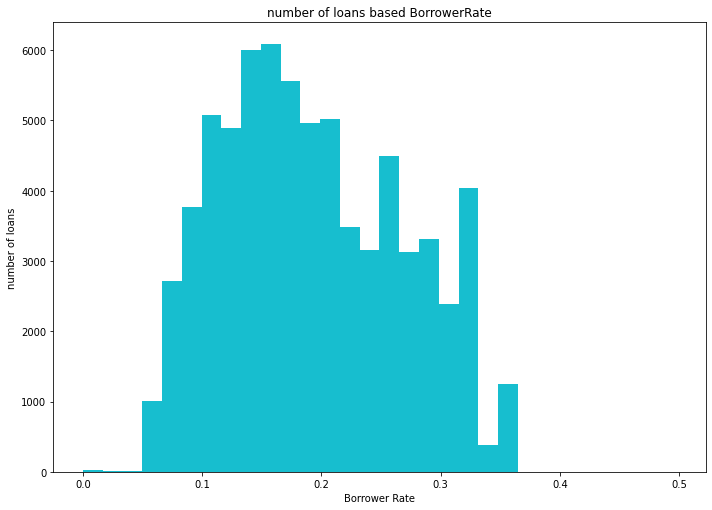

In [117]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans[features], x='BorrowerRate', bins=30, color = default_color);
plt.title('number of loans based BorrowerRate')
plt.xlabel('Borrower Rate')
plt.ylabel('number of loans')

#### The distribution of the BorrowerRate appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [118]:
# Check the frequency of the top 5 peaks round tow number
loan[features].BorrowerRate.round(2).value_counts().nlargest(5)

0.14    6476
0.18    6371
0.16    5990
0.32    5925
0.15    5632
Name: BorrowerRate, dtype: int64

In [119]:
# Check the frequency of the top 2 peaks
loan[features].BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3500    1905
Name: BorrowerRate, dtype: int64

#### Turns out two most common rates are 0.3177 and 0.3500. Let's check ProsperRating (Alpha) next:

#### Because ProsperRating (Alpha) is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [120]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_list)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

(0.0, 70778.0)

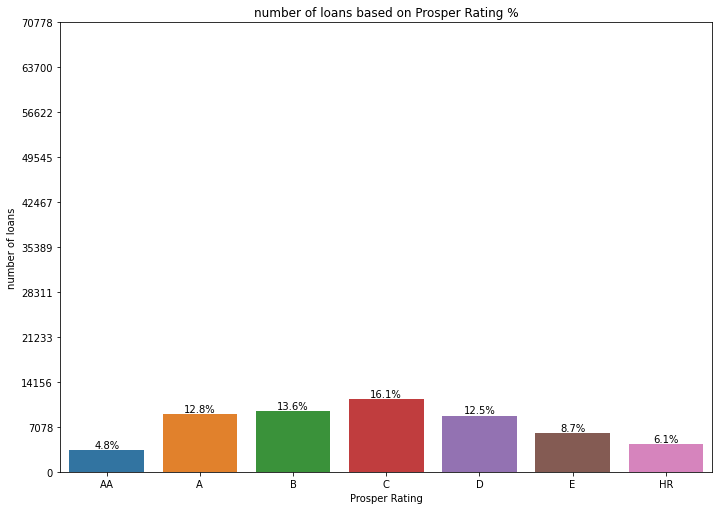

In [121]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans[features], x='ProsperRating (Alpha)')
plt.title('number of loans based on Prosper Rating %')
plt.xlabel('Prosper Rating')
plt.ylabel('number of loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### Interestingly enough ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through ListingCategory (numeric):

(0.0, 70778.0)

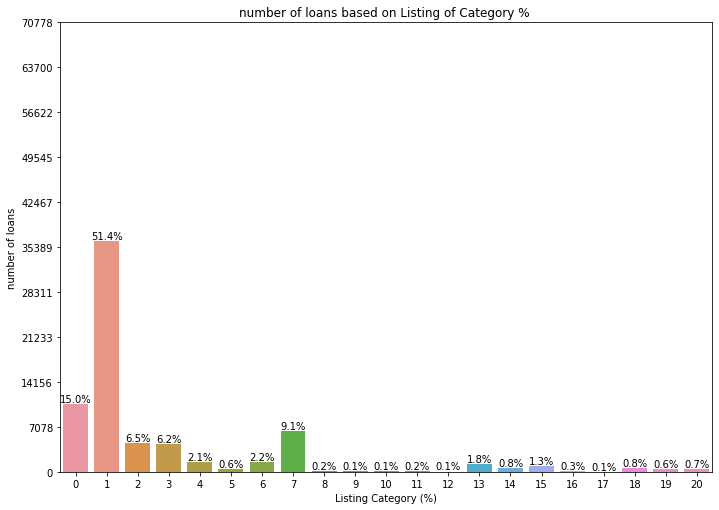

In [122]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans[features], x='ListingCategory (numeric)')
plt.title('number of loans based on Listing of Category % ')
plt.xlabel('Listing Category (%)')
plt.ylabel('number of loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business, 
4 - Personal Loan, 
5 - Student Use, 
6 - Auto, 
7- Other, 
8 - Baby&Adoption, 
9 - Boat, 
10 - Cosmetic Procedure, 
11 - Engagement Ring, 
12 - Green Loans, 
13 - Household Expenses, 
14 - Large Purchases, 
15 - Medical/Dental, 
16 - Motorcycle, 
17 - RV, 
18 - Taxes, 
19 - Vacation, 
20 - Wedding Loans

#### The vast majority of loans are used for debt consolidation. Other notable categories include Other, Home Improvement and Business. Next variable - EmploymentStatus:

(0.0, 70778.0)

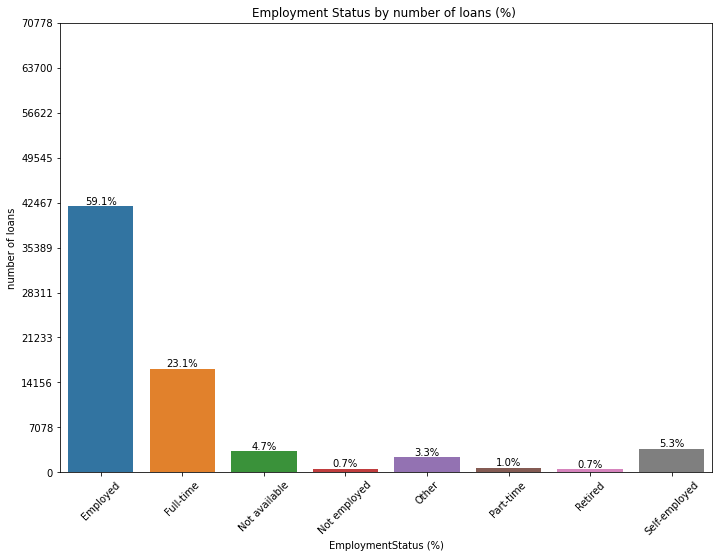

In [123]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans[features], x='EmploymentStatus')
plt.title('Employment Status by number of loans (%) ')
plt.xlabel('EmploymentStatus (%)')
plt.ylabel('number of loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=45);
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### The majority of borrowers are Employed (59%) and Full-time (23%) all other categories constitute only small numbers of the borrowers. Let's move to the DelinquenciesLast7Years variable:

Text(0, 0.5, 'number of loans')

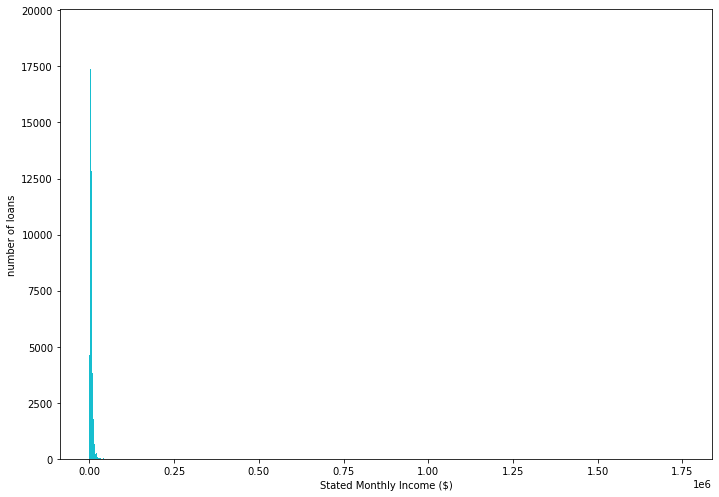

In [124]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans[features], x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('number of loans')

#### Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [125]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loans['StatedMonthlyIncome'].std()
income_mean = loans['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loans['StatedMonthlyIncome'] >= boundary)

70778

Text(0, 0.5, 'number of loans')

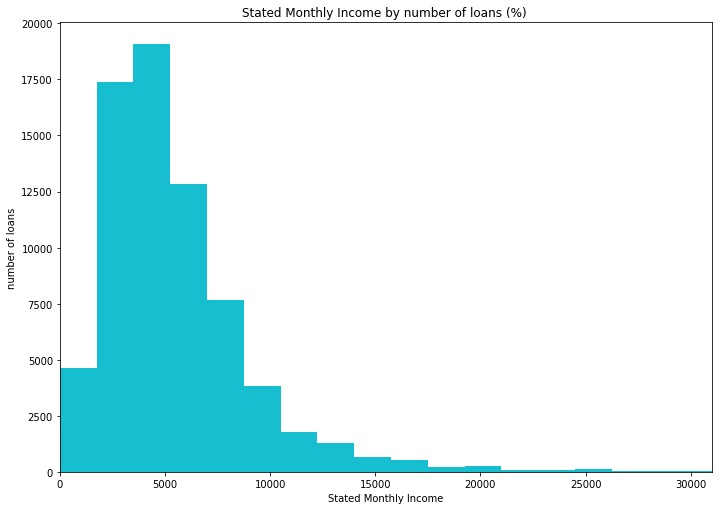

In [126]:
#Let's take a close look at the StatedMonthlyIncome;
# This time limit x scale by boundary
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans[features], x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary);
plt.title('Stated Monthly Income by number of loans (%) ')
plt.xlabel('Stated Monthly Income')
plt.ylabel('number of loans')

#### With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is between 2500 and 7,500. Next step – TotalProsperLoans:

(0.0, 70778.0)

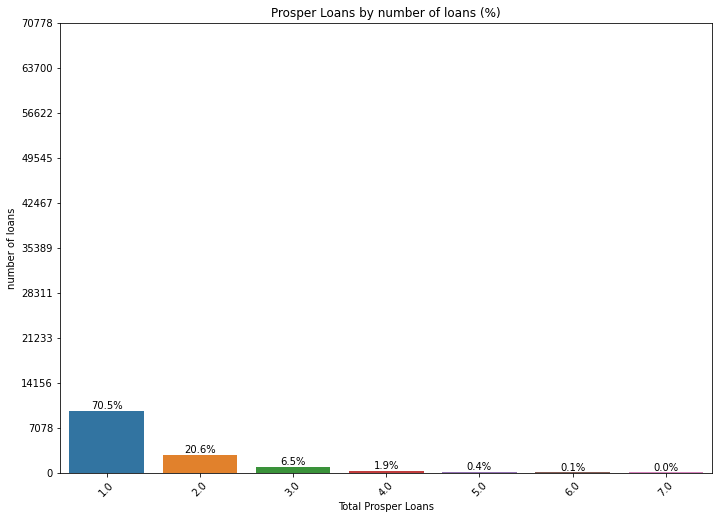

In [127]:
plt.figure(figsize=[ 11.69, 8.27])
ncount_=len(loans['TotalProsperLoans'].dropna())
ax=sb.countplot(data=loans[features], x='TotalProsperLoans')
plt.title('Prosper Loans by number of loans (%)')
plt.xlabel('Total Prosper Loans')
plt.ylabel('number of loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount_), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=45);
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 7 loans. Next step - LoanOriginalAmount:

Text(0, 0.5, 'number of loans')

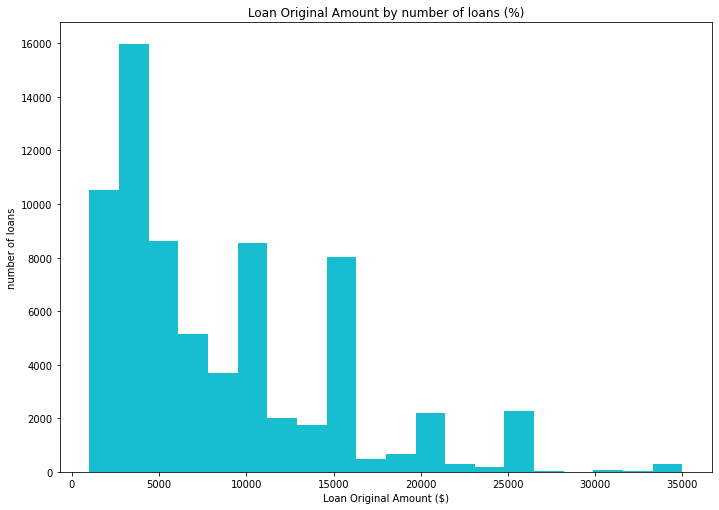

In [128]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans[features], x='LoanOriginalAmount', bins=20, color=default_color)
plt.title('Loan Original Amount by number of loans (%)')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('number of loans')

#### It looks like most of the loans are below 15,000 range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc.
#### Let's move on to LoanOriginationDate:

Text(0.5, 1.0, 'number of Loans by quarter')

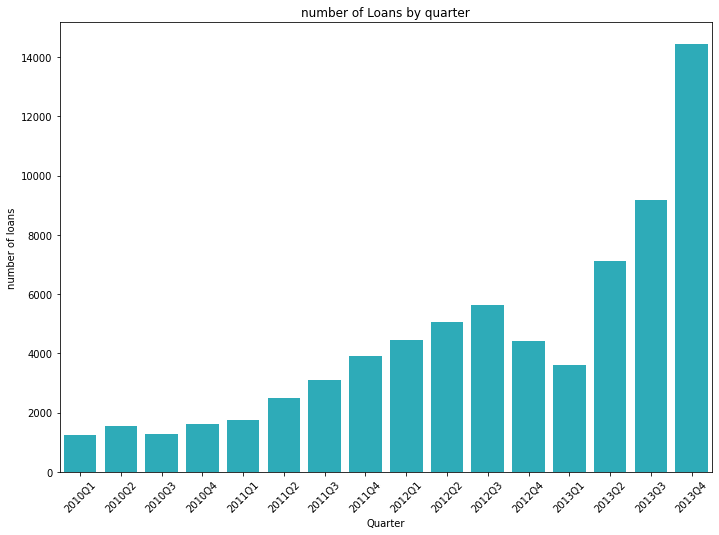

In [129]:
plt.figure(figsize=[ 11.69, 8.27])

plt.xticks(rotation=45)
sb.countplot(data=loans[features], x='quarter', color=default_color );
plt.xlabel('Quarter')
plt.ylabel('number of loans')
plt.title('number of Loans by quarter')

####  Q4 - 2013 has higher number of loans.
####  Clearly that 2013 had the highest number of loan applications.

Text(0.5, 1.0, 'number of Loans by Borrower Rate')

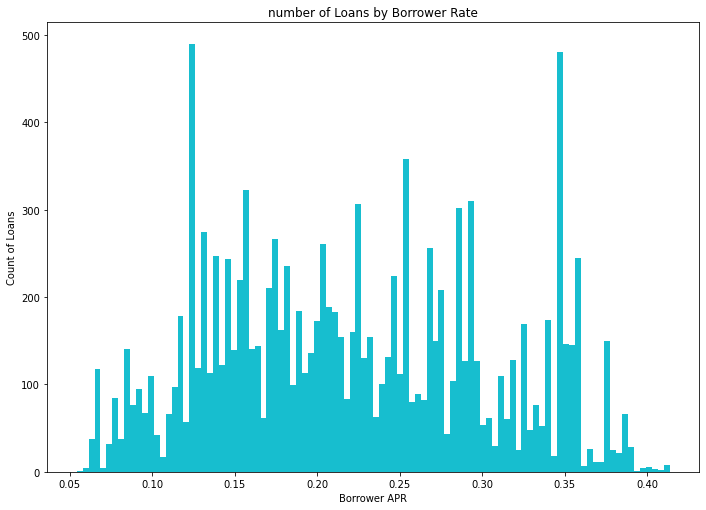

In [130]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans[features].dropna(), x='BorrowerAPR', bins=100,color=default_color);
plt.xlabel('Borrower APR')
plt.ylabel('Count of Loans')
plt.title('number of Loans by Borrower Rate')

In [131]:
loans['BorrowerAPR'].groupby(loans['BorrowerAPR'].apply(lambda x: round(x, 1)),sort=False).agg(['count'])

,count
BorrowerAPR,
0.4,6407
0.2,30443
0.1,16014
0.3,17872
0.0,26
0.5,3


In [132]:
loans['BorrowerAPR'].groupby(loans['BorrowerAPR'].apply(lambda x: round(x, 2)),sort=False).agg(['count'])

,count
BorrowerAPR,
0.36,3854
0.22,2809
0.19,2748
0.23,2729
0.17,3034
0.11,1239
0.16,3418
0.20,3648
0.29,2441


#### The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [133]:
# getting a first overview over the variable ProsperScore
print(loans.ProsperScore.describe())
print(loans.ProsperScore.value_counts())

count     52764.0
unique       11.0
top           4.0
freq       7850.0
Name: ProsperScore, dtype: float64
4.0     7850
6.0     7560
8.0     7501
7.0     6510
5.0     6115
3.0     4799
9.0     4281
2.0     3614
10.0    2961
11.0     937
1.0      636
Name: ProsperScore, dtype: int64


Text(0.5, 1.0, 'number of Loans by Prosper Score')

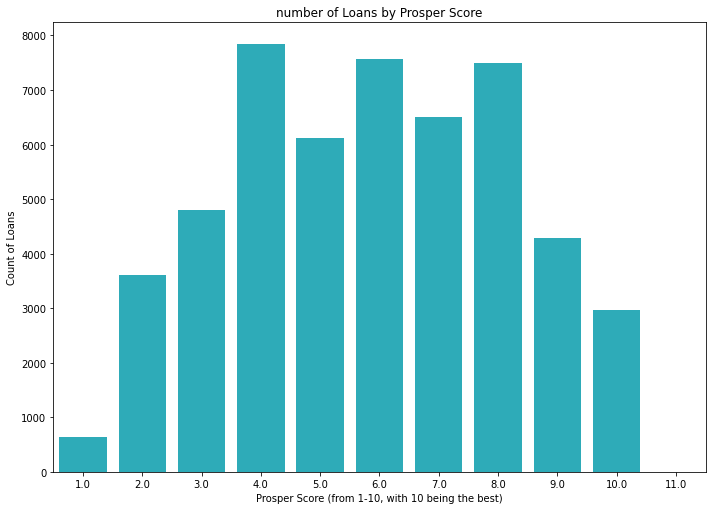

In [134]:
 #Bar Chart ProsperScore (custom risk score built using historical Prosper data)
# The score ranges from 1-10, with 10 being the best, or lowest risk score)
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loans[loans['ProsperScore'] != 11], x = 'ProsperScore', color = default_color)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');
plt.ylabel('Count of Loans')
plt.title('number of Loans by Prosper Score')

#### Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper. Furthermore, not many borrowers received the highest score of 10

(0.0, 70778.0)

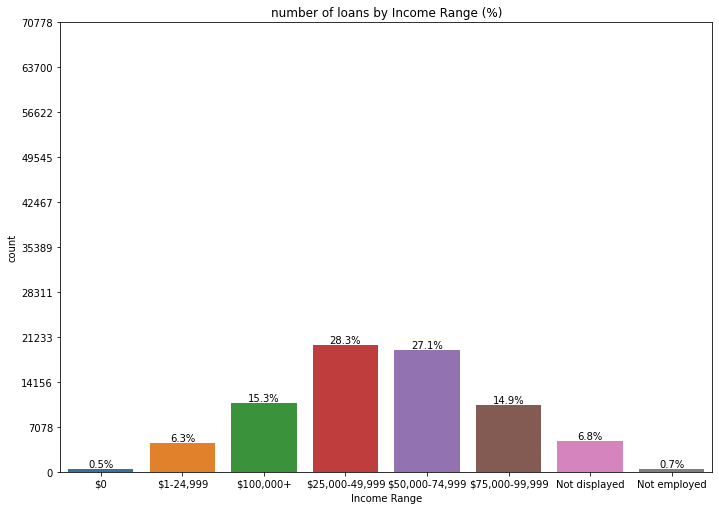

In [135]:
plt.figure(figsize=[ 11.69, 8.27])
IncomeRange_order=["Not displayed", "Not employed", "$0","$1-24,999","$25,000-49,999",
                   "$50,000-74,999","$75,000-99,999","$100,000+" ]
ncount=len(loans)
ax=sb.countplot(data=loans[features], x='IncomeRange')
plt.title('number of loans by Income Range (%)')
plt.xlabel('Income Range')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

In [136]:
loans['IncomeRange'].groupby(loans['IncomeRange']).count()

IncomeRange
$0                  379
$1-24,999          4490
$100,000+         10816
$25,000-49,999    20009
$50,000-74,999    19193
$75,000-99,999    10555
Not displayed      4833
Not employed        503
Name: IncomeRange, dtype: int64

#### Clearly, most of (" 28.4%") loaners are have a salary of "25,000-49,999" and "50,000-74,999." After that, on the second level ("27.2%"), laoners are making "$75,000-99,999" and "$100,000+." Rest of loaner, either are not employed, or making "<$25,000"

## Bivariate Exploration


##### To start off with, we will look at the pairwise correlations present between features in the data.

In [137]:
#Numberical vs Categorical features
numeric_vars = ['BorrowerRate', 
                'StatedMonthlyIncome','LoanOriginalAmount',
                'ListingCategory (numeric)', 'TotalProsperLoans','ProsperScore']

categoric_vars = ['Term','LoanStatus', 'ProsperScore', 'EmploymentStatus','IncomeRange']

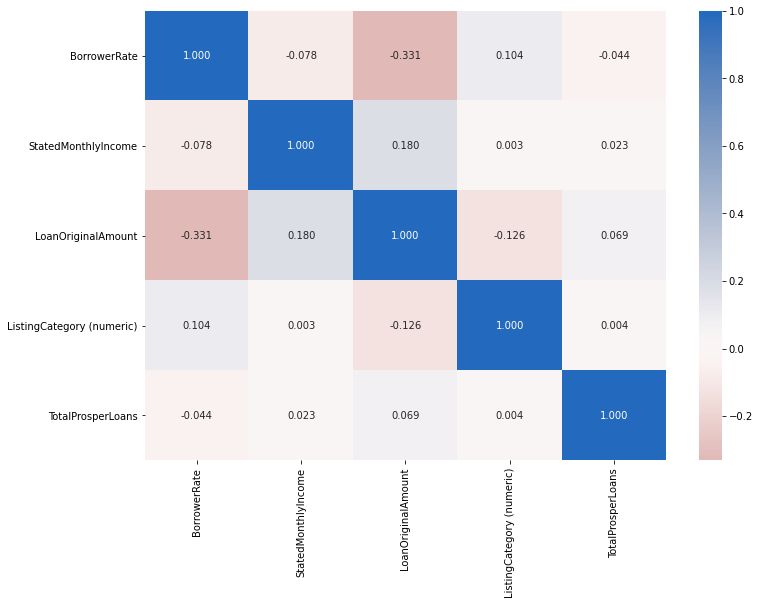

In [138]:
# correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

#### Correlation Plot: There are no strong positive relationships between any pairs. It makes sense because higher BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. 

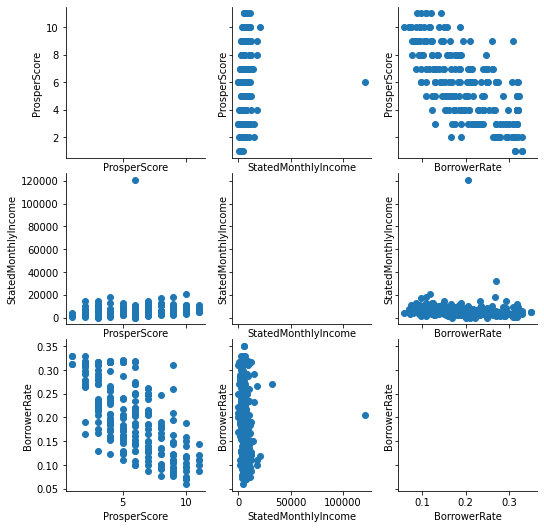

In [139]:
# plot matrix: only 300 random loans are used to see the pattern more clearer
numeric_vars = [ 'ProsperScore', 
            'StatedMonthlyIncome','BorrowerRate' ]

samples = np.random.choice(loan[features].shape[0], 300, replace = False)
loan_samp = loan[features].loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
#plt.title('Matrix Plot')
xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

#### Matrix Plot: Similar to the correlation plot, we can determine which pair has negative or  positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. StatedMonthlyIncome does not give useful information on BorrowerAPR and will not be further analyzed.


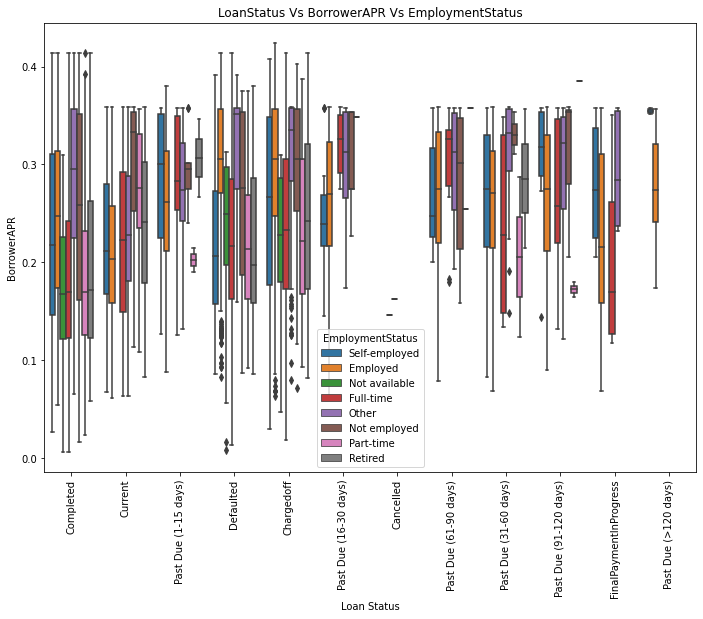

In [140]:
# LoanStatus Vs BorrowerAPR VS EmploymentStatus
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0:]
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue='EmploymentStatus', data= loan[features], palette=base_color);
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.title('LoanStatus Vs BorrowerAPR Vs EmploymentStatus');

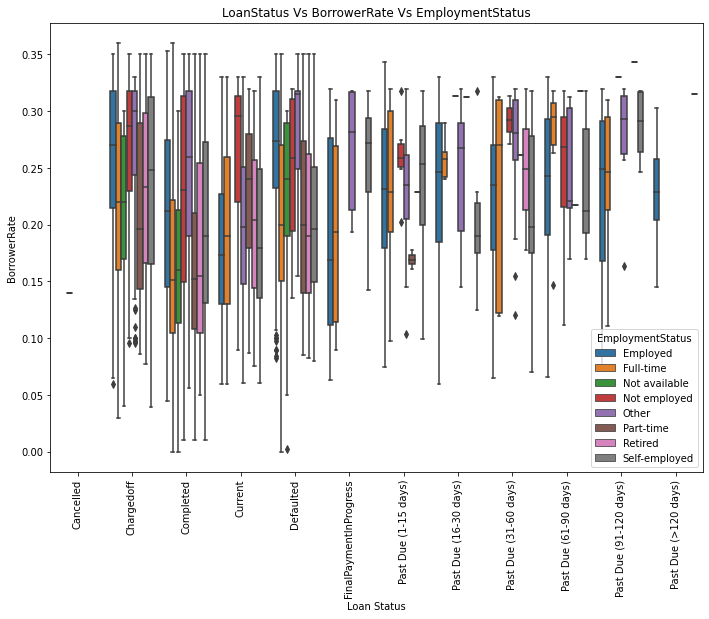

In [141]:
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0:]
sb.boxplot(x="LoanStatus", y="BorrowerRate", hue='EmploymentStatus', data=loans, palette=base_color);
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('BorrowerRate');
plt.title('LoanStatus Vs BorrowerRate Vs EmploymentStatus');

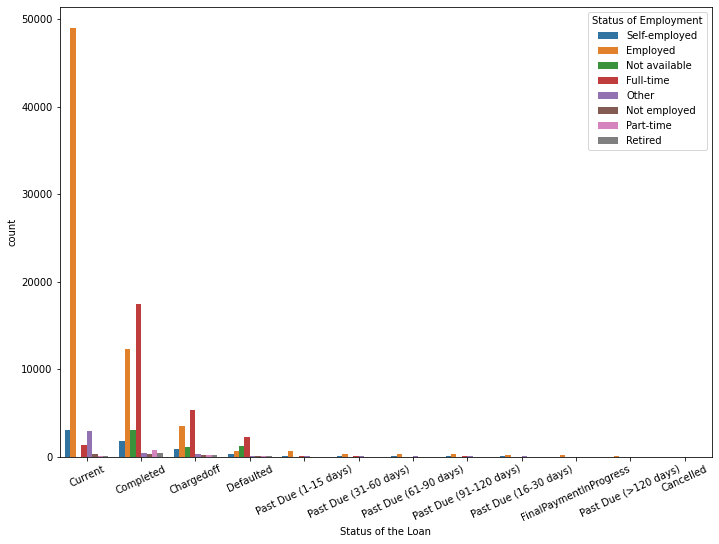

In [142]:
#plotting EmploymentStatus (Status of Employment) against LoanStatus with help of a heat map
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loan[features], x = 'LoanStatus', hue = 'EmploymentStatus', order = loans['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 1, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The status of the employment of the borrower seem not to have an impact on the outcome of the loan.


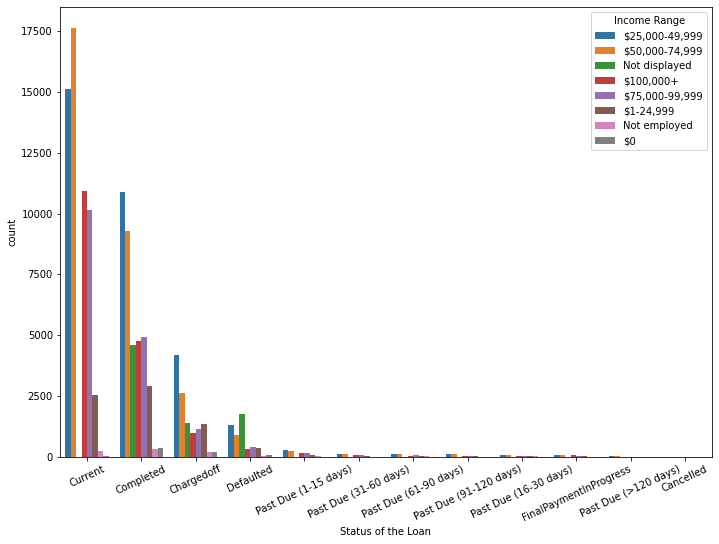

In [143]:
#plotting Income Range against LoanStatus with help of a heat map
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loan[features], x = 'LoanStatus', hue = 'IncomeRange', order = loans['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 1, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The Income Range of the borrower seem not to have an impact on the outcome of the loan.


#### let's look at relationships between the four categorical features.

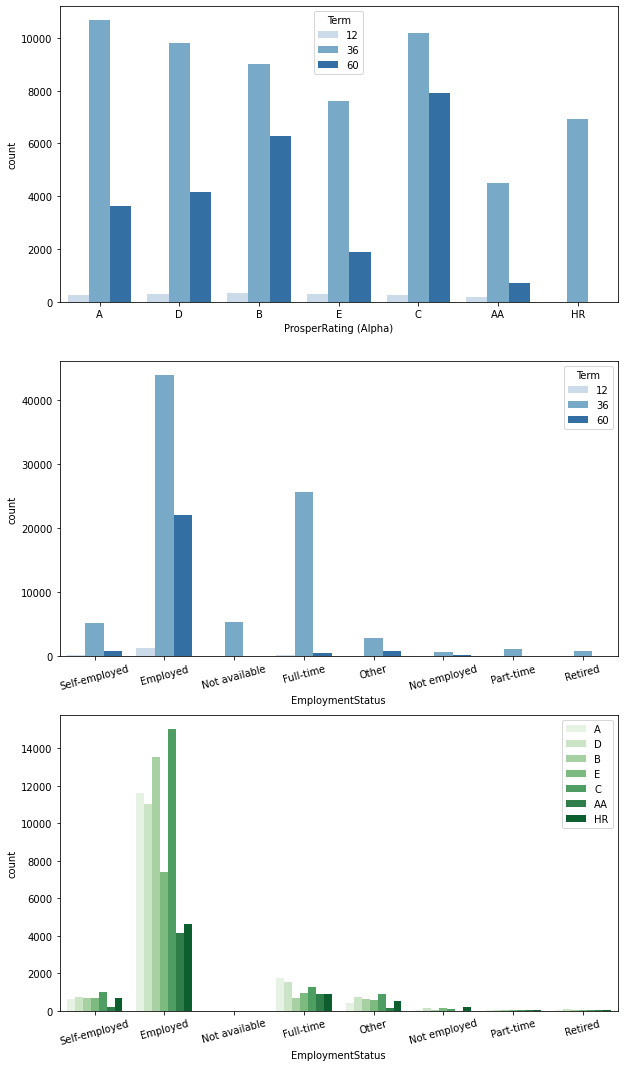

In [144]:
plt.figure(figsize = [10, 25])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = loan[features], x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loan[features], x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)
# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loan[features], x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 1); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

#### The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

<Figure size 841.68x595.44 with 0 Axes>

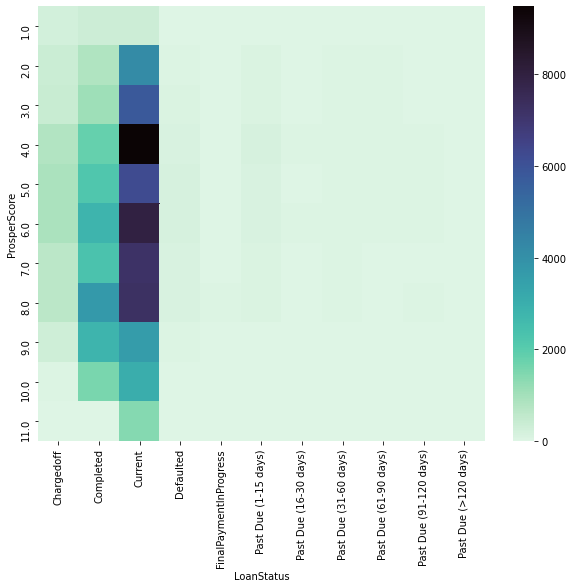

In [145]:
plt.figure(figsize=[ 11.69, 8.27])
ct_counts=loan[features].groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)
plt.figure(figsize = [10,8])
sb.heatmap(ct_counts,cmap="mako_r");

#### Above graph shows that 1. in this data most people currenly have a loan or completed their loans and their interest rate is ~4-8.



### Talk about some of the relationships you observed in this part of the investigation. 
How did the feature(s) of interest vary with other features in the dataset?
###### 1- Most of those who completed their loans has a ProsperScore above 3. 
###### 2- Most of those who currently has loan, has a ProsperScore of 4, and the minimum count of loaners belong to those who has a ProsperScore of 1.
###### 3- The majority (~50,000) of people who currenly has a loan are empolyed no matter what is their ProsperScore. 
###### 4- If their ProsperScore is between 4 and 8, the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000. 
###### 5- In ProsperScore of 2 to 8, the number of loaners who has a salary of 25-49k and 50-74k is more than others salary groups and if the ProsperScore is between 4 and 8, the popluation of both salries of 25-49k and 50-74k groups ranges between 2500 and 3900. 
###### 6- Plots also show that BorrowerRate has a negative relationship with LoanOriginalAmount and has a postive relationship with ProsperScore. 
###### 7- IncomeRange also affect the LoanOriginalAmount in a positive way. The plot of the full data using a violin plot suggests that borrow rate is independant of income range and ranges ~0.15-0.21

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
#### There is a positive relationshi between ProsperScore and LoanOriginalAmount. The number of people with emplyed and full time status who currently have a loan or completed their laons is much higher than other people with other employment status. In this data, most people currenly have a loan or completed their loans, and their interest rates is ~4-8.

## Multivariate Exploration

## Exploration

#### The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount

### 1- Dose Term effect on relationship of APR and loan amount?

#### Observation:
##### Term doesn't seem to have effect on relationship of Borrower APR and loan amount

<Figure size 841.68x595.44 with 0 Axes>

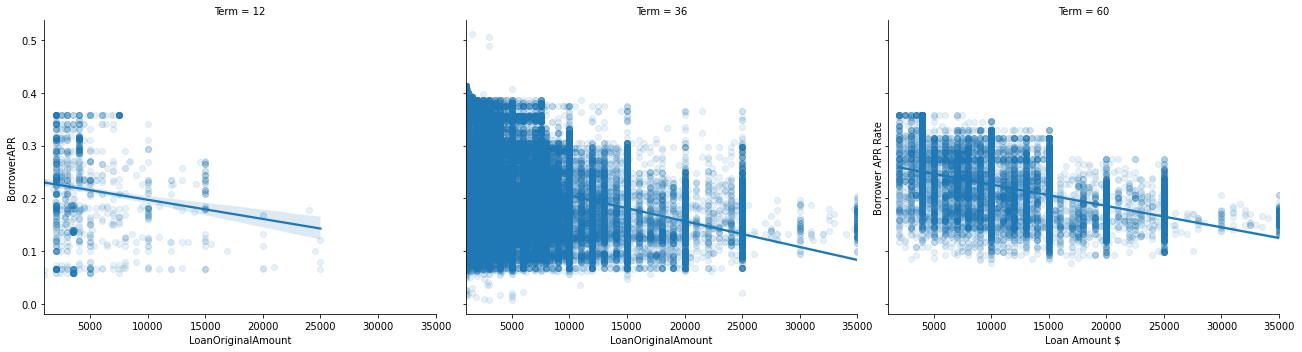

In [146]:
# Term effect on relationship of APR and loan amount
plt.figure(figsize=[ 11.69, 8.27])
g=sb.FacetGrid(data=loans[features], aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sb.regplot,'LoanOriginalAmount','BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
#plt.title('Loan Amount  vs Borrower APR Rate vs Term')
plt.xlabel('Loan Amount $')
plt.ylabel('Borrower APR Rate')
plt.show()

### 2- Prosper rating effect on relationship of APR and loan amount

#### Observation:
##### 1- The loan amount increases with better rating. 
##### 2- The borrower APR decreases with better rating.
##### 3- Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

<Figure size 841.68x595.44 with 0 Axes>

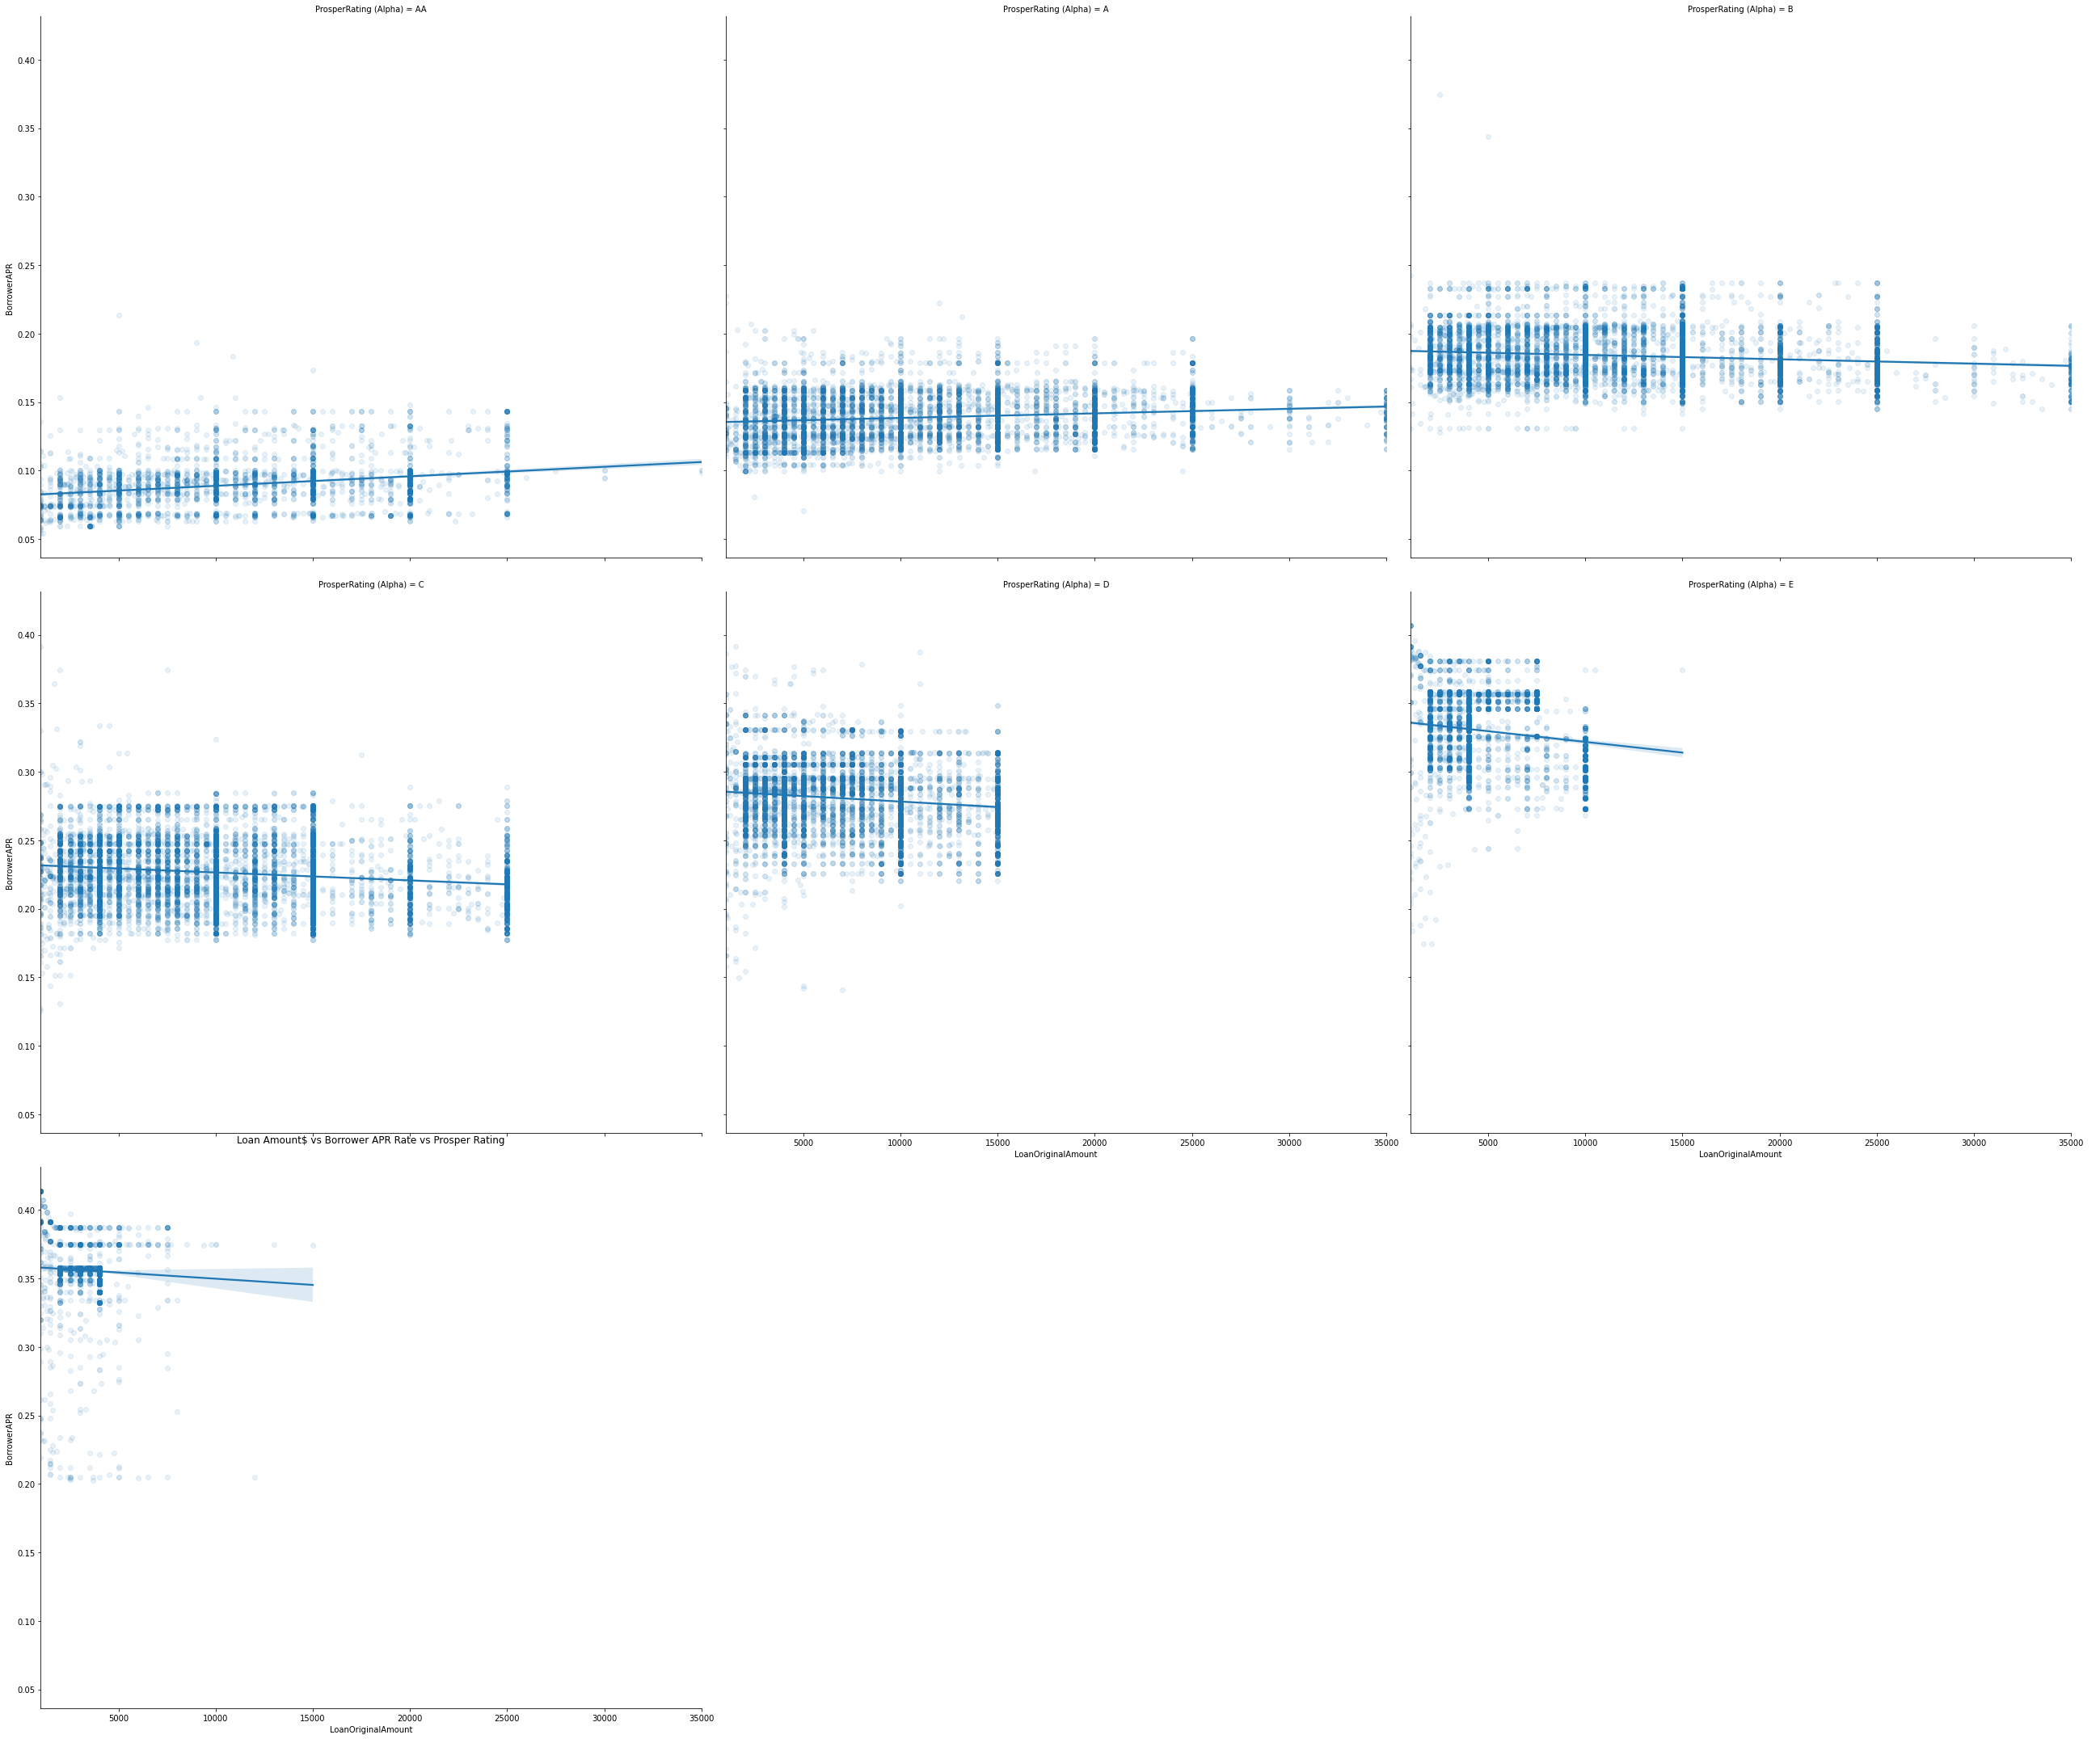

In [147]:
# Prosper rating effect on relationship of APR and loan amount
plt.figure(figsize=[ 11.69, 8.27])
g=sb.FacetGrid(data=loans[features], aspect=1.2, height=10, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.title('Loan Amount$ vs Borrower APR Rate vs Prosper Rating',pad=30)
g.add_legend();
plt.show()


### 3- Borrower APR across Prosper rating and term

#### Observation:
##### Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

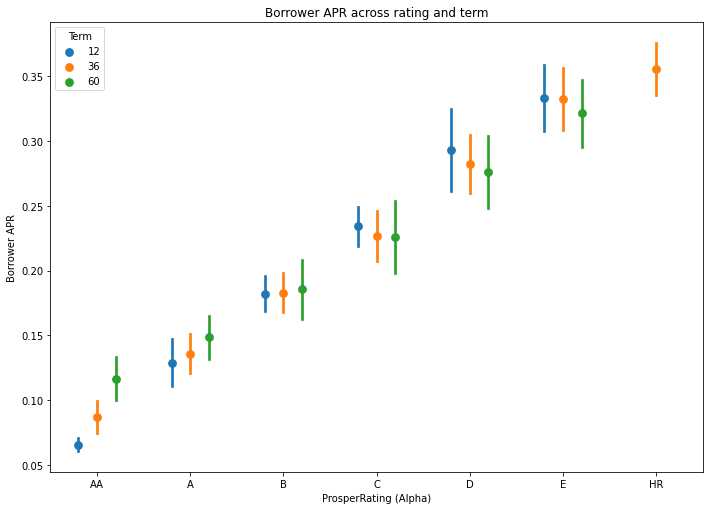

In [148]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = loans[features], x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
          prop=fontP, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);

### 4- Borrower APR across employment status and term

#### Observation:
##### the borrower APR not effect from employment status.

##### 2- the borrower APR effect from Prosper Rateing.
##### 3- We can also clearly observe that "HR" prosper rating applicants have higher interest rates,conversely, "AA" they have a lower rate.

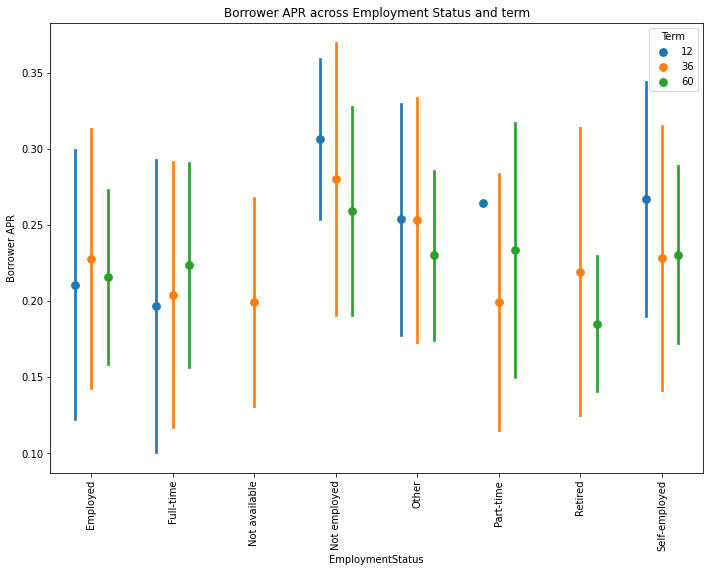

In [149]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = loans[features], x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           prop=fontP, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Employment Status and term')
plt.ylabel('Borrower APR')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

Text(0.5, 0, 'Prosper Rating')

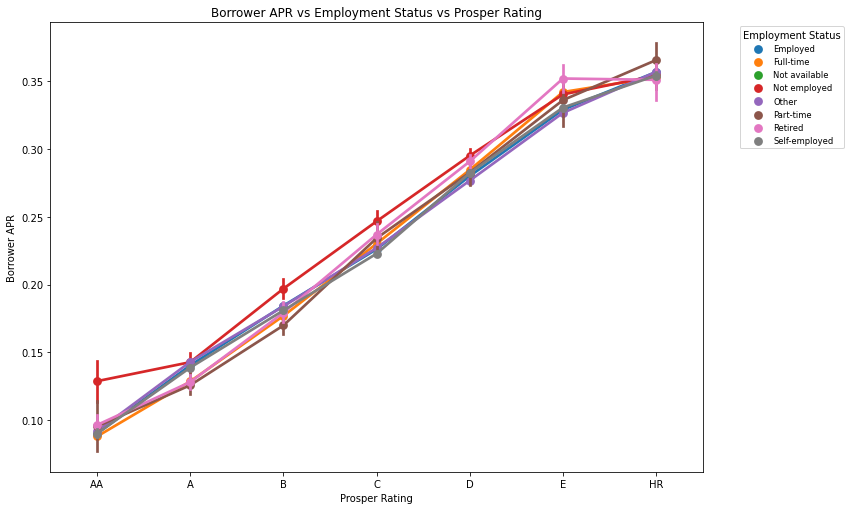

In [150]:
plt.figure(figsize=[ 11.69, 8.27])
sb.pointplot(data = loans[features], x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', 
             hue = 'EmploymentStatus')
plt.title('Borrower APR vs Employment Status vs Prosper Rating');
plt.legend( title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.title('Borrower APR vs Employment Status vs Prosper Rating');
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Rating')

### 5- The Prosper rating and term effects on stated monthly income and loan original amount

#### Observation:
##### For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings.
##### But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

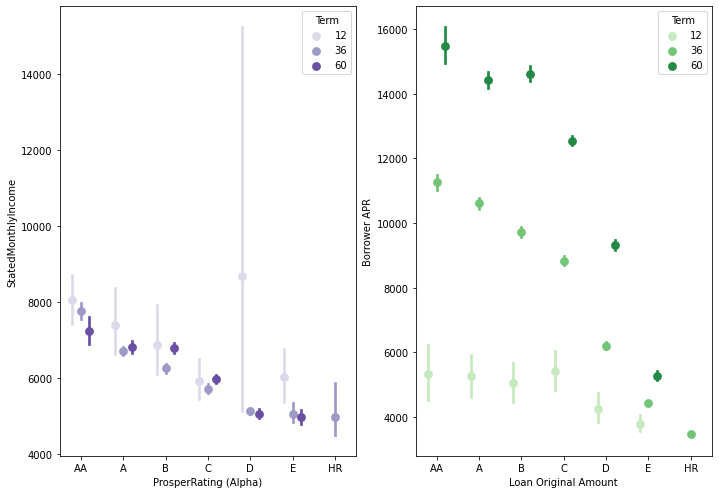

In [151]:
fig, ax = plt.subplots(ncols=2, figsize=[ 11.69, 8.27])
sb.pointplot(data = loans[features], x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', 
             hue = 'Term',palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
#plt.title('Term vs Monthly Income vs Prosper Rating');
plt.ylabel('Stated Monthly Income')
plt.xlabel('Prosper Rating')
sb.pointplot(data = loans[features], x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', 
             hue = 'Term',palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);
#plt.title('Term vs Loan Amount vs Prosper Rating');
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.show()

#### Continue the observations:
##### We can see that income range effect on Loan Amount,Loan amount increase when income range is increase.

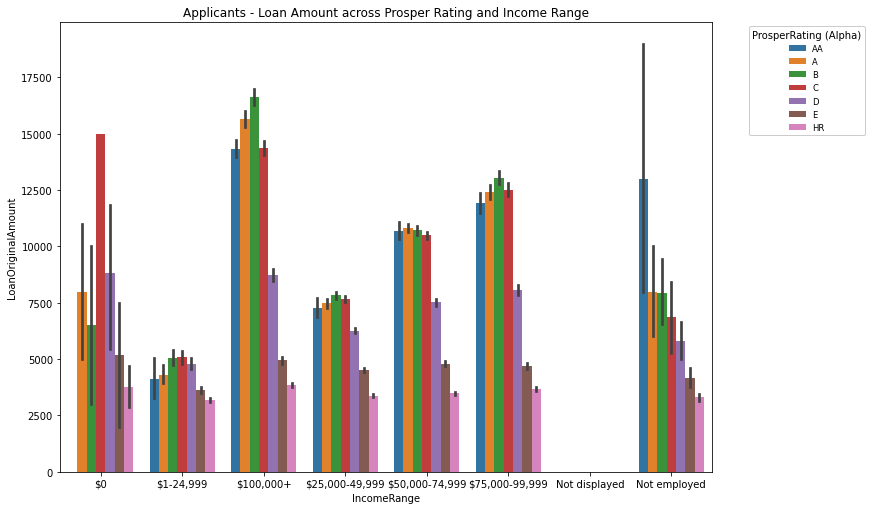

In [152]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = loans[features], x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ax.legend(ncol =1, framealpha = 1, title = 'ProsperRating (Alpha)',bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');
plt.show()

### 3- Does rating depend on the monhtly income and Employment status?

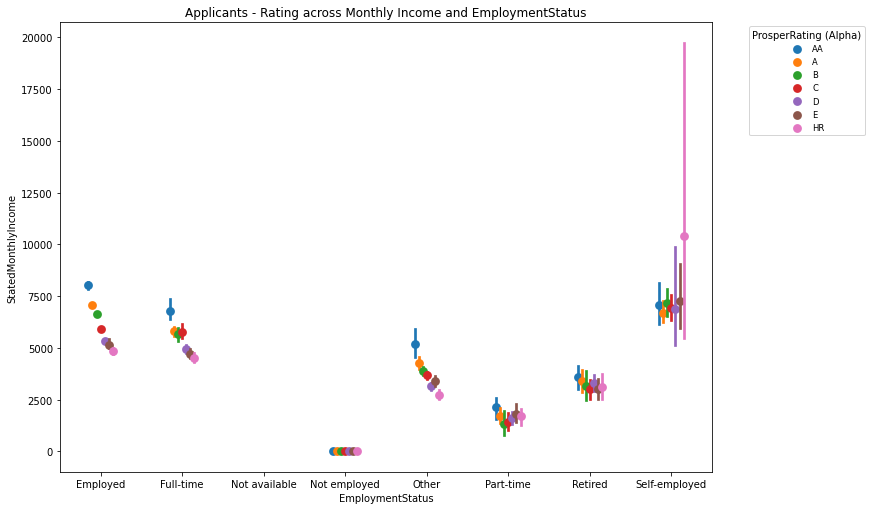

In [153]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = loans[features], x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');
plt.legend( title='ProsperRating (Alpha)', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Insights from the multivariate exploration data
#### For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

#### Employed and full time employees have their mean salaries in higher range

#### Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

#### The monthly income of borrowers are having higher values for employed, other and full time employment status 

#### with the prosper rating of AA, A and B

#### We can also clearly observe that HR prosper rating applicants have higher interest rates

### To conclude this analysis
To conclude this analysis , 
1- I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange,  and Prosper Rating.